# TP 7 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

Nota: Las funciones utilizadas se encuentran en el archivo functions.py

In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *
import cv2

In [2]:
from functions import *

In [3]:
%load_ext autoreload
%autoreload 2

***
# 1 -
### Aplicar la operación de dilación a la imagen de la izquierda siendo el elemento estructural:
#### B = [0, 1, 0; 1, 1, 1; 0, 1, 0]
(Broken_Text.tif)

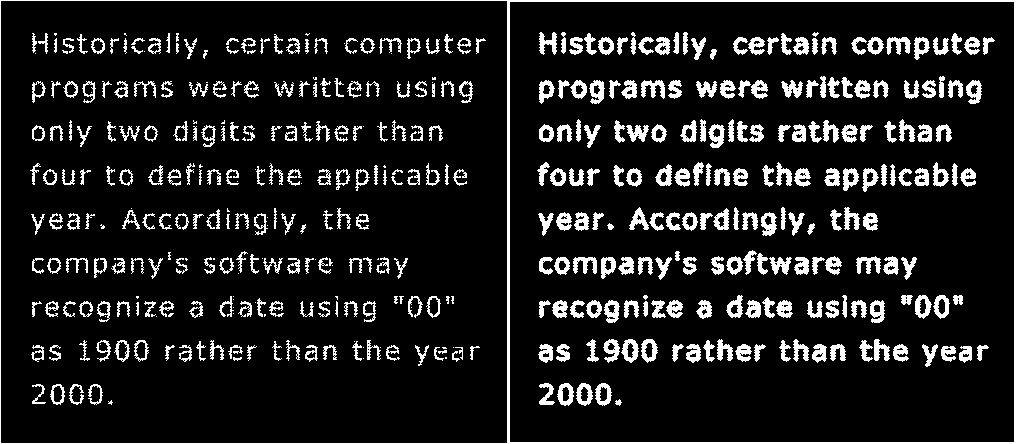

In [9]:
# Reading the input image
text = cv2.imread("img/Broken_Text.tif")
 
kernel = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype=np.uint8)
 
text_dilation = cv2.dilate(text, kernel, iterations=1)
 
h, w = text.shape[:2]
comparison = np.concatenate([text, text_dilation], axis=1)

displayImage_fromcv2(comparison, 2*w, h)